[산점도_버블그래프]

두 개의 컬럼(변수)간 관계를 시각화

수치형 데이터에 사용

In [6]:
#모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#데이터 준비
f_data=r'C:\Users\desktop\EX_PANDAS 06\data\auto_mpg.csv'

In [8]:
# csv => df
df=pd.read_csv(f_data)

In [9]:
#컬럼별 타입 확인
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [10]:
#연비와 관련이 높은 컬럼(변수) 확인 w. 상관계수
df.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [11]:
#연비와 관련이 높은 컬럼(변수) 확인 w. 상관계수
corrsr=df.corr(numeric_only=True)['mpg']
round(corrsr['weight'],2)

-0.83

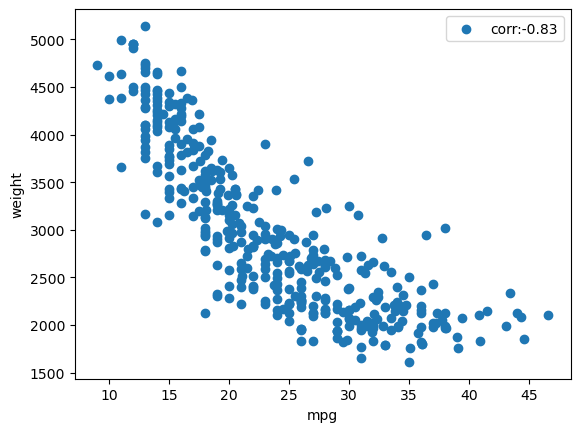

In [12]:
#연비와 관련이 높은 컬럼(변수) 확인 w. 시각화
plt.scatter(df.mpg,df.weight,label=f'corr:{round(corrsr["weight"],2)}')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

In [13]:
#mpg 컬럼과 다른 컬럼 간 관계 시각화
corrsr=df.corr(numeric_only=True)['mpg']
corrsr

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'i'

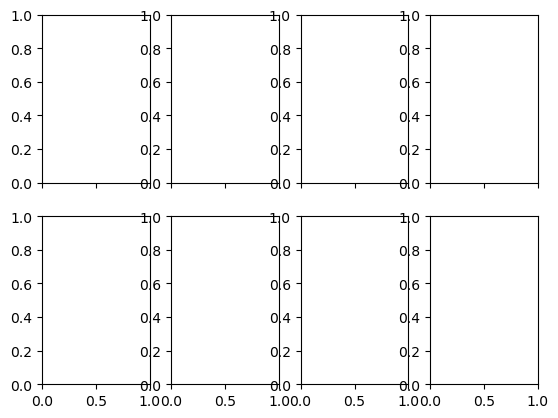

In [14]:
fig,((a1,a2,a3,a4),(b1,b2,b3,b4))=plt.subplots(2,4,sharex=True)

for i in corrsr.index:
    plt.scatter(df.mpg,df.i,label=f'corr:{round(corrsr["i"],2)}')
    plt.xlabel('mpg')
    plt.ylabel('i')
    plt.legend()
    plt.show()

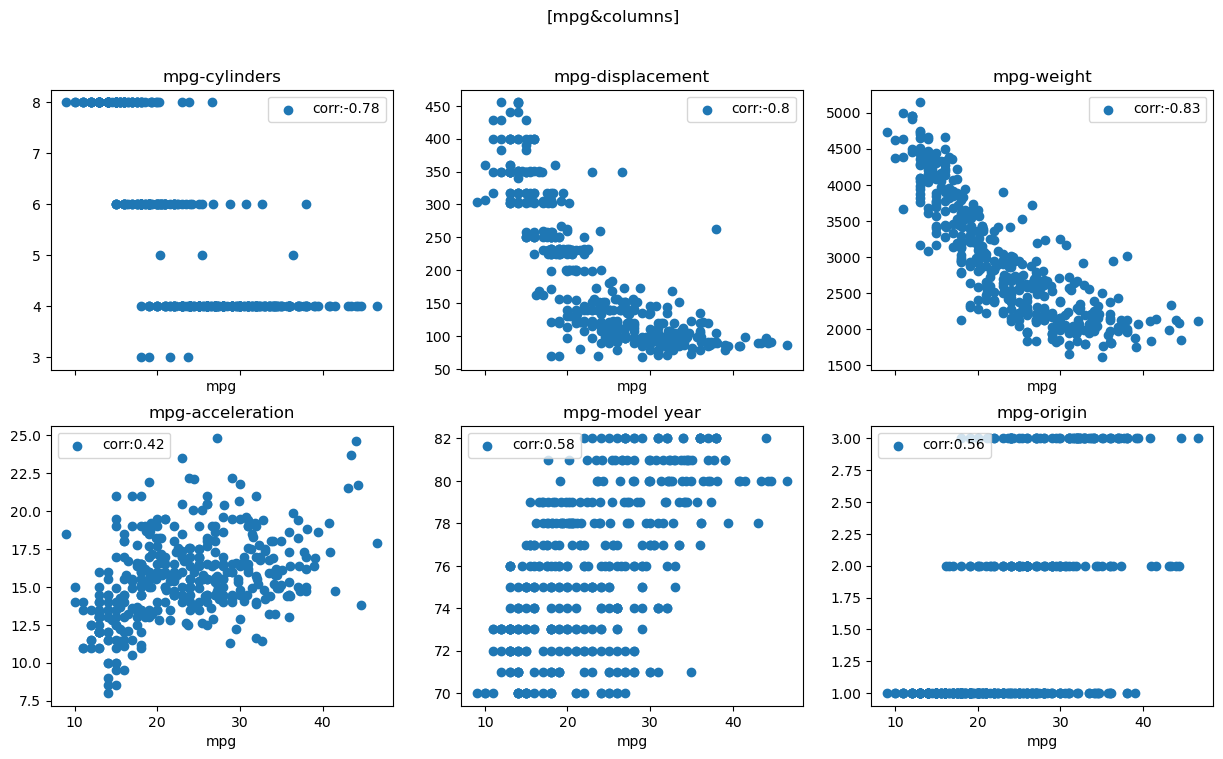

In [15]:
fig=plt.figure(figsize=(15,8))

axs=fig.subplots(2,3,sharex=True)

for row in range(2):
    for col in range(3):
        col_name=corrsr.index[row*3+col+1]
        axs[row,col].scatter(df['mpg'],df[corrsr.index[row*3+col+1]],label=f'corr:{round(corrsr[col_name],2)}')
        axs[row,col].set_xlabel('mpg')
        axs[row,col].set_title(f'mpg-{col_name}')
        axs[row,col].legend()

fig.suptitle('[mpg&columns]')
plt.show()

# 연비와 무게, 실린더 수의 관계 

- 연비와 무게: 반비례 관계(높은 상관관계)
- 연비와 실린더 개수: 반비례 관계

In [21]:
df['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

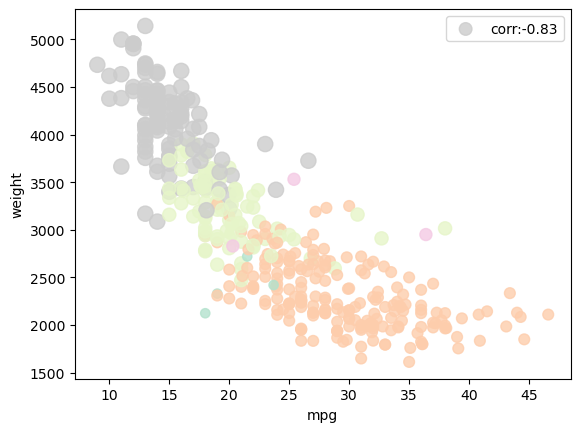

In [38]:
#mpg와 weight 관계 산점도 그래프로 시각화
plt.scatter(df.mpg,df.weight,
            label=f'corr:{round(corrsr["weight"],2)}',
            s=df['cylinders']*15,
            c=df['cylinders'],cmap='Pastel2',
            alpha=0.8)
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()